# Topix Exploratory Analyses / Data Challenge  <img style="float: right;" src="./Data/Topix_Logo.png">
  
---  

## Submitted by: Heather M. Steich, M.S.  
## Date: August 6$^{th}$, 2017

We're looking for you to showcase your skills (e.g. analyze, build predictive model, [. . .]) with the attached *World Health Organization Zika Case Reports* dataset.  Your 1-2 page report should include:  

 - a summary of your interesting findings / model  
 - at least one visualization  
 - a written description of the approach you took  
 - a question you cannot fully answer with the current data provided along with what data you'd need to answer the question  
 - a list of the technologies along with any code / commands you used  

Please submit the doc by **Sunday, Aug 6th**.  
  
---  

In [1]:
## LOAD LIBRARIES

# Data wrangling & processing: 
import numpy as np
import pandas as pd

# Machine learning:
#from sklearn import metrics
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

# Plotting:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Remove warning messages:
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
## ESTABLISH PLOT FORMATTING

#mpl.rcdefaults()  # Resets plot defaults

def plt_format():
    %matplotlib inline
    plt.rcParams['figure.figsize'] = (16, 10)
    plt.rcParams['font.size'] = 16
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['axes.labelcolor'] = 'black'
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['axes.titlesize'] = 32
    plt.rcParams['axes.titleweight'] = 'bold'
    plt.rcParams['legend.fontsize'] = 16
    plt.rcParams['legend.markerscale'] = 4
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.rcParams['legend.fontsize'] = 16
    plt.rcParams['legend.frameon'] = False
    plt.rcParams['axes.linewidth'] = 1

#plt.rcParams.keys()  # Available rcParams
plt_format()

In [3]:
## LOAD DATA:

# Read TSV file of the World Health Organization's Zica Virus Case Report data:
raw_df = pd.read_csv("./Data/who-zika-case-reports.csv")

# Print shapes:
print('Raw Zica TSV Shape:', raw_df.shape)
print('Raw Zica Column Names:', raw_df.columns)
raw_df.head()

Raw Zica TSV Shape: (681, 29)
Raw Zica Column Names: Index(['Sub-Region', 'Alpha3Code', 'Alpha Ctry Code', 'Total Cases',
       'Country / territory', 'Country name', 'Date', 'Deaths',
       'EpiWeek onset', 'Imported cases', 'Laboratory confirmed cases',
       'Nombre Pais', 'NumCtryCode (Countries codes)', 'Num Ctry Code',
       'Number of GBS associated with Zika', 'Number of GBS',
       'Number of Records', 'Number of microcephalies associated',
       'Other Neuro complications', 'Other source of transmission',
       'Pregnant women', 'Report Epi Week', 'Severe cases', 'Sovereign',
       'Status', 'Suspected cases (bin)', 'Suspected cases',
       'Total Cases (bin)', 'Year'],
      dtype='object')


,Sub-Region,Alpha3Code,Alpha Ctry Code,Total Cases,Country / territory,Country name,Date,Deaths,EpiWeek onset,Imported cases,...,Other source of transmission,Pregnant women,Report Epi Week,Severe cases,Sovereign,Status,Suspected cases (bin),Suspected cases,Total Cases (bin),Year
0,South Cone,BRA,BRA,680700%,Brazil,Brazil,"April, 2015",0.0,8,0,...,0,0,17,0,Brazil,Member State,4K,6807,642600%,2015
1,South Cone,BRA,BRA,800%,Brazil,Brazil,"May, 2015",0.0,0,0,...,0,0,19,0,Brazil,Member State,0K,0,0%,2015
2,South Cone,BRA,BRA,0%,Brazil,Brazil,"May, 2015",0.0,0,0,...,0,0,20,0,Brazil,Member State,0K,0,0%,2015
3,South Cone,BRA,BRA,3900%,Brazil,Brazil,"July, 2015",0.0,25,0,...,0,0,27,58,Brazil,Member State,0K,39,0%,2015
4,Latin Caribbean,PRI,PRI,0%,Puerto Rico,Puerto Rico,"October, 2015",0.0,0,0,...,0,0,40,0,United States,Associated Member,0K,0,0%,2015


In [4]:
raw_df.describe()

,Deaths,EpiWeek onset,Imported cases,Laboratory confirmed cases,NumCtryCode (Countries codes),Num Ctry Code,Number of GBS associated with Zika,Number of GBS,Number of Records,Number of microcephalies associated,Other Neuro complications,Other source of transmission,Pregnant women,Report Epi Week,Severe cases,Suspected cases,Year
count,680.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.0,681.0,681.000000,681.0,681.000000,681.000000,681.000000,681.000000,681.000000
mean,0.017647,0.750367,0.051395,4.060206,429.124816,429.124816,0.011747,0.634361,1.0,0.0,0.005874,0.0,9.616740,31.023495,0.123348,197.444934,2015.349486
std,0.229581,5.811697,0.557306,28.174001,224.967966,224.967966,0.179485,9.830023,0.0,0.0,0.121125,0.0,149.565965,20.638899,2.392279,1990.280426,0.477158
min,0.000000,0.000000,0.000000,0.000000,52.000000,52.000000,0.000000,0.000000,1.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,2015.000000
25%,0.000000,0.000000,0.000000,0.000000,222.000000,222.000000,0.000000,0.000000,1.0,0.0,0.000000,0.0,0.000000,4.000000,0.000000,0.000000,2015.000000
50%,0.000000,0.000000,0.000000,0.000000,388.000000,388.000000,0.000000,0.000000,1.0,0.0,0.000000,0.0,0.000000,43.000000,0.000000,0.000000,2015.000000
75%,0.000000,0.000000,0.000000,0.000000,591.000000,591.000000,0.000000,0.000000,1.0,0.0,0.000000,0.0,0.000000,48.000000,0.000000,0.000000,2016.000000
max,4.000000,52.000000,10.000000,526.000000,862.000000,862.000000,3.000000,252.000000,1.0,0.0,3.000000,0.0,3177.000000,52.000000,58.000000,47172.000000,2016.000000


In [5]:
pd.isnull(raw_df).sum()

Sub-Region                             0
Alpha3Code                             0
Alpha Ctry Code                        0
Total Cases                            0
Country / territory                    0
Country name                           0
Date                                   0
Deaths                                 1
EpiWeek onset                          0
Imported cases                         0
Laboratory confirmed cases             0
Nombre Pais                            0
NumCtryCode (Countries codes)          0
Num Ctry Code                          0
Number of GBS associated with Zika     0
Number of GBS                          0
Number of Records                      0
Number of microcephalies associated    0
Other Neuro complications              0
Other source of transmission           0
Pregnant women                         0
Report Epi Week                        0
Severe cases                           0
Sovereign                              0
Status          

In [6]:
raw_df.duplicated().sum()

7

In [7]:
raw_df[raw_df.duplicated()]

,Sub-Region,Alpha3Code,Alpha Ctry Code,Total Cases,Country / territory,Country name,Date,Deaths,EpiWeek onset,Imported cases,...,Other source of transmission,Pregnant women,Report Epi Week,Severe cases,Sovereign,Status,Suspected cases (bin),Suspected cases,Total Cases (bin),Year
114,Latin Caribbean,HTI,HTI,0%,Haiti,Haiti,"October, 2015",0.0,0,0,...,0,0,43,0,Haiti,Member State,0K,0,0%,2015
161,Latin Caribbean,HTI,HTI,0%,Haiti,Haiti,"November, 2015",0.0,0,0,...,0,0,44,0,Haiti,Member State,0K,0,0%,2015
196,Latin Caribbean,HTI,HTI,0%,Haiti,Haiti,"November, 2015",0.0,0,0,...,0,0,45,0,Haiti,Member State,0K,0,0%,2015
216,Latin Caribbean,HTI,HTI,0%,Haiti,Haiti,"November, 2015",0.0,0,0,...,0,0,46,0,Haiti,Member State,0K,0,0%,2015
250,Latin Caribbean,HTI,HTI,0%,Haiti,Haiti,"November, 2015",0.0,0,0,...,0,0,47,0,Haiti,Member State,0K,0,0%,2015
286,Latin Caribbean,HTI,HTI,0%,Haiti,Haiti,"December, 2015",0.0,0,0,...,0,0,48,0,Haiti,Member State,0K,0,0%,2015
354,Latin Caribbean,HTI,HTI,0%,Haiti,Haiti,"December, 2015",0.0,0,0,...,0,0,50,0,Haiti,Member State,0K,0,0%,2015


In [8]:
raw_df.iloc[:, 0].unique()

array(['South Cone', 'Latin Caribbean', 'Non Latin Caribbean', 'Andean',
       'Central America', 'North America'], dtype=object)

In [9]:
raw_df.iloc[:, 1].unique()

array(['BRA', 'PRI', 'ABW', 'CUW', 'SXM', 'BOL', 'COL', 'ECU', 'VEN',
       'CRI', 'SLV', 'GTM', 'HND', 'NIC', 'PAN', 'DOM', 'HTI', 'BRB',
       'GUY', 'JAM', 'VCT', 'SUR', 'TTO', 'MEX', 'PRY', 'VIR', 'MAF',
       'GLP', 'GUF', 'MTQ', 'BES'], dtype=object)

In [10]:
raw_df.iloc[:, 2].unique()

array(['BRA', 'PRI', 'ABW', 'CUW', 'SXM', 'BOL', 'COL', 'ECU', 'VEN',
       'COR', 'SLV', 'GTM', 'HND', 'NIC', 'PAN', 'DOM', 'HTI', 'BRB',
       'GUY', 'JAM', 'VCT', 'SUR', 'TTO', 'MEX', 'PRY', 'VIR', 'MAF',
       'GLP', 'GUF', 'MTQ', 'BES'], dtype=object)

In [11]:
raw_df.iloc[:, 3].unique()

array(['680700%', '800%', '0%', '3900%', '9800%', '4600%', '34300%',
       '300%', '34000%', '400%', '41400%', '83600%', '200%', '4717200%',
       '113600%', '19500%', '100%', '106500%', '700%', '35100%',
       '1659300%', '600%', '140000%', '84600%', '183800%', '91400%',
       '500%', '147600%', '75300%', '2000%', '102400%', '46400%', '5500%',
       '900%', '169600%', '31600%', '26700%', '6200%', '1300%', '181900%',
       '109000%', '60800%', '1800%', '1200%', '288800%', '101800%',
       '11500%', '111900%', '16900%', '123100%', '387800%', '83900%',
       '131000%', '2700%', '1000%', '9600%', '1600%', '14400%', '106400%',
       '109700%', '534800%', '469300%', '78900%', '143600%', '7700%',
       '20400%', '3100%', '19800%', '164500%', '591000%', '1900%',
       '12700%', '1500%', '545600%', '66100%', '2600%', '8200%', '197700%',
       '22900%', '37100%', '211000%', '6000%'], dtype=object)

In [12]:
raw_df.iloc[:, 4].unique()

array(['Brazil', 'Puerto Rico', 'Aruba', 'Curacao', 'Sint Maarten',
       'Bolivia', 'Colombia', 'Ecuador', 'Venezuela', 'Costa Rica',
       'El Salvador', 'Guatemala', 'Honduras', 'Nicaragua', 'Panama',
       'Dominican Republic', 'Haiti', 'Barbados', 'Guyana', 'Jamaica',
       'Saint Vincent and the Grenadines', 'Suriname',
       'Trinidad and Tobago', 'Mexico', 'Paraguay',
       'United States Virgin Islands', 'Saint Martin', 'Guadeloupe',
       'French Guiana', 'Martinique', 'Bonaire'], dtype=object)

In [13]:
raw_df.iloc[:, 5].unique()

array(['Brazil', 'Puerto Rico', 'Aruba', 'Curacao', 'Sint Maarten',
       'Bolivia', 'Colombia', 'Ecuador', 'Venezuela', 'Costa Rica',
       'El Salvador', 'Guatemala', 'Honduras', 'Nicaragua', 'Panama',
       'Dominican Republic', 'Haiti', 'Barbados', 'Guyana', 'Jamaica',
       'Saint Vincent and the Grenadines', 'Suriname',
       'Trinidad and Tobago', 'Mexico', 'Paraguay',
       'United States Virgin Islands', 'Saint Martin', 'Guadeloupe',
       'French Guiana', 'Martinique', 'Bonaire, Saint Eustatius and Saba'], dtype=object)

In [14]:
raw_df.iloc[:, 6].unique()

array(['April, 2015', 'May, 2015', 'July, 2015', 'October, 2015',
       'November, 2015', 'December, 2015', 'January, 2016',
       'February, 2016'], dtype=object)

In [15]:
raw_df.iloc[:, 7].unique()

array([  0.,   3.,   4.,  nan,   1.])

In [16]:
raw_df.iloc[:, 8].unique()

array([ 8,  0, 25, 39, 45, 52,  5], dtype=int64)

In [17]:
raw_df.iloc[:, 9].unique()

array([ 0,  1,  4, 10,  5,  7,  2], dtype=int64)

In [18]:
raw_df.iloc[:, 10].unique()

array([  0,   8,   9,  46, 193,  93,   4,  52,  95,   2,  90,   1,   3,
         6,  37,  61,   5,  24,  20,  36,   7,  10,  67,  13,  30,  12,
        22,  39, 252,  16,  29, 281,  31, 173,  19,  15, 108,  26, 526,  11], dtype=int64)

In [19]:
raw_df.iloc[:, 11].unique()

array(['Brasil', 'Puerto Rico', 'Aruba', 'Curazao',
       'Isla de San Martín (Holanda)', 'Bolivia', 'Colombia', 'Ecuador',
       'Venezuela', 'Costa Rica', 'El Salvador', 'Guatemala', 'Honduras',
       'Nicaragua', 'Panamá', 'República Dominicana', 'Haití', 'Barbados',
       'Guyana', 'Jamaica', 'San Vicente y las Granadinas', 'Suriname',
       'Trinidad y Tobago', 'México', 'Paraguay', 'Islas Vírgenes (EUA)',
       'Isla de San Martín (Francia)', 'Guadalupe', 'Guayana Francesa',
       'Martinica', 'Bonaire, San Eustaquio y Saba'], dtype=object)

In [20]:
raw_df.iloc[:, 12].unique()

array([ 76, 630, 533, 531, 534,  68, 170, 218, 862, 188, 222, 320, 340,
       558, 591, 214, 332,  52, 328, 388, 670, 740, 780, 484, 600, 850,
       663, 312, 254, 474, 535], dtype=int64)

In [21]:
raw_df.iloc[:, 13].unique()

array([ 76, 630, 533, 531, 534,  68, 170, 218, 862, 188, 222, 320, 340,
       558, 591, 214, 332,  52, 328, 388, 670, 740, 780, 484, 600, 850,
       663, 312, 254, 474, 535], dtype=int64)

In [22]:
raw_df.iloc[:, 14].unique()

array([0, 3, 2], dtype=int64)

In [23]:
raw_df.iloc[:, 15].unique()

array([  0,   2,   1,   4,   8,   3,   6,   9,  15,  14,  23,  27,  13,
       252,  10], dtype=int64)

In [24]:
raw_df.iloc[:, 16].unique()  # All 1's

array([1], dtype=int64)

In [25]:
raw_df.iloc[:, 17].unique()  # All 0's

array([0], dtype=int64)

In [26]:
raw_df.iloc[:, 18].unique()

array([0, 3, 1], dtype=int64)

In [27]:
raw_df.iloc[:, 19].unique()  # All 0's

array([0], dtype=int64)

In [28]:
raw_df.iloc[:, 20].unique()

array([   0,   63,    1,   19,   31,   29, 3177,   17,    8,   13, 1836,
       1343,    4,    3], dtype=int64)

In [29]:
raw_df.iloc[:, 21].unique()

array([17, 19, 20, 27, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
        1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

In [30]:
raw_df.iloc[:, 22].unique()

array([ 0, 58,  3, 23], dtype=int64)

In [31]:
raw_df.iloc[:, 23].unique()

array(['Brazil', 'United States', 'Netherlands', 'Bolivia', 'Colombia',
       'Ecuador', 'Venezuela', 'Costa Rica', 'El Salvador', 'Guatemala',
       'Honduras', 'Nicaragua', 'Panama', 'Dominican Republic', 'Haiti',
       'Barbados', 'Guyana', 'Jamaica', 'St. Vincent and the Grenadines',
       'Suriname', 'Trinidad and Tobago', 'Mexico', 'Paraguay',
       'United States of America', 'France'], dtype=object)

In [32]:
raw_df.iloc[:, 24].unique()

array(['Member State', 'Associated Member', 'Other',
       'Overseas collectivities', 'Participating State \\Territory'], dtype=object)

In [33]:
raw_df.iloc[:, 25].unique()

array(['4K', '0K', '47K', '13K'], dtype=object)

In [34]:
raw_df.iloc[:, 26].unique()

array([ 6807,     0,    39,    89,   150,     3,   247,   362,   741,
       47172,  1046,   195,  1065,   348, 16593,  1363,   846,  1777,
         914,     5,  1452,   753,   988,   464,    55,     2,  1686,
         316,   200,    62,  1789,  1090,   608,    13,  2866,  1018,
          78,  1119,     4,   130,  1231,  3626,   839,  1310,    27,
          96,   115,  1064,  1097,  5067,  4693,   789,  1436,    77,
         204,   185,  1645,  5737,   351,   119,  5348,   661,    82,
        1451,   221,   360,  2110,    59], dtype=int64)

In [35]:
raw_df.iloc[:, 27].unique()

array(['642600%', '0%', '4498200%', '1606500%', '321300%'], dtype=object)

In [36]:
raw_df.iloc[:, 28].unique()

array([2015, 2016], dtype=int64)

In [37]:
## COLUMNS WITH IDENTICAL ENTRIES

raw_df[raw_df.iloc[:, 1] != raw_df.iloc[:, 2]]  # All the same except 22 rows have hace "CRI" vs. "COR" for alpha code.
# According to 3 sources, Costa Rica's Alpha-3 country code is "CRI" and "COR" is not a valid country code.
#http://www.nationsonline.org/oneworld/country_code_list.htm
#https://unstats.un.org/unsd/tradekb/Knowledgebase/50347/Country-Code
#3https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3


raw_df[raw_df.iloc[:, 4] != raw_df.iloc[:, 5]]  
# All but 20 rows differ in name from "Bonaire" as "Bonaire, Saint Eustatius and Saba."
# Collectively, these islands are known as the "Caribbean Netherlands"
#https://en.wikipedia.org/wiki/Caribbean_Netherlands

raw_df[raw_df.iloc[:, 12] != raw_df.iloc[:, 13]]  # 0 rows are different; can drop one or the other.
# Drop one to the columns (#13)

raw_df[raw_df.iloc[:, 11] != raw_df.iloc[:, 23]]  # 381 rows.
# This is because other countries technically own these countries.
raw_df[raw_df.iloc[:, 5] != raw_df.iloc[:, 23]]  # 234 rows; "".
raw_df[raw_df.iloc[:, 4] != raw_df.iloc[:, 23]]  # 234 rows; "".

# PER JASON: Ignore "Total Cases" (#3), "Total Cases (bin)" (#27) and "Suspected cases (bin)" (#25).

,Sub-Region,Alpha3Code,Alpha Ctry Code,Total Cases,Country / territory,Country name,Date,Deaths,EpiWeek onset,Imported cases,...,Other source of transmission,Pregnant women,Report Epi Week,Severe cases,Sovereign,Status,Suspected cases (bin),Suspected cases,Total Cases (bin),Year
4,Latin Caribbean,PRI,PRI,0%,Puerto Rico,Puerto Rico,"October, 2015",0.0,0,0,...,0,0,40,0,United States,Associated Member,0K,0,0%,2015
5,Non Latin Caribbean,ABW,ABW,0%,Aruba,Aruba,"October, 2015",0.0,0,0,...,0,0,40,0,Netherlands,Associated Member,0K,0,0%,2015
6,Non Latin Caribbean,CUW,CUW,0%,Curacao,Curacao,"October, 2015",0.0,0,0,...,0,0,40,0,Netherlands,Associated Member,0K,0,0%,2015
7,Non Latin Caribbean,SXM,SXM,0%,Sint Maarten,Sint Maarten,"October, 2015",0.0,0,0,...,0,0,40,0,Netherlands,Associated Member,0K,0,0%,2015
23,Non Latin Caribbean,VCT,VCT,0%,Saint Vincent and the Grenadines,Saint Vincent and the Grenadines,"October, 2015",0.0,0,0,...,0,0,40,0,St. Vincent and the Grenadines,Member State,0K,0,0%,2015
29,Non Latin Caribbean,VIR,VIR,0%,United States Virgin Islands,United States Virgin Islands,"October, 2015",0.0,0,0,...,0,0,40,0,United States of America,Other,0K,0,0%,2015
30,Latin Caribbean,MAF,MAF,0%,Saint Martin,Saint Martin,"October, 2015",0.0,0,0,...,0,0,40,0,France,Overseas collectivities,0K,0,0%,2015
31,Latin Caribbean,GLP,GLP,0%,Guadeloupe,Guadeloupe,"October, 2015",0.0,0,0,...,0,0,40,0,France,Participating State \Territory,0K,0,0%,2015
32,Latin Caribbean,GUF,GUF,0%,French Guiana,French Guiana,"October, 2015",0.0,0,0,...,0,0,40,0,France,Participating State \Territory,0K,0,0%,2015
33,Latin Caribbean,MTQ,MTQ,0%,Martinique,Martinique,"October, 2015",0.0,0,0,...,0,0,40,0,France,Participating State \Territory,0K,0,0%,2015


In [38]:
raw_df[raw_df.iloc[:, 4] != raw_df.iloc[:, 11]][["Country name", "Nombre Pais"]].drop_duplicates()

,Country name,Nombre Pais
0,Brazil,Brasil
6,Curacao,Curazao
7,Sint Maarten,Isla de San Martín (Holanda)
17,Panama,Panamá
18,Dominican Republic,República Dominicana
19,Haiti,Haití
23,Saint Vincent and the Grenadines,San Vicente y las Granadinas
25,Trinidad and Tobago,Trinidad y Tobago
26,Mexico,México
29,United States Virgin Islands,Islas Vírgenes (EUA)


In [39]:
raw_df[["Country name", "Alpha3Code", "Num Ctry Code"]].drop_duplicates()  # All match and identify the correct countries

,Country name,Alpha3Code,Num Ctry Code
0,Brazil,BRA,76
4,Puerto Rico,PRI,630
5,Aruba,ABW,533
6,Curacao,CUW,531
7,Sint Maarten,SXM,534
8,Bolivia,BOL,68
9,Colombia,COL,170
10,Ecuador,ECU,218
11,Venezuela,VEN,862
12,Costa Rica,CRI,188


In [40]:
## DROP COLUMNS THAT DON'T CONTRIBUTE

zika_df = raw_df[['Sub-Region', 'Total Cases', 'Country name', 'Date', 'Deaths', 
    'EpiWeek onset', 'Imported cases', 'Laboratory confirmed cases', 'Num Ctry Code',
    'Number of GBS associated with Zika', 'Number of GBS', 'Other Neuro complications',
    'Pregnant women', 'Report Epi Week', 'Severe cases', 'Sovereign',
    'Status', 'Suspected cases (bin)', 'Suspected cases', 'Total Cases (bin)', 'Year']]

zika_df.head()

,Sub-Region,Total Cases,Country name,Date,Deaths,EpiWeek onset,Imported cases,Laboratory confirmed cases,Num Ctry Code,Number of GBS associated with Zika,...,Other Neuro complications,Pregnant women,Report Epi Week,Severe cases,Sovereign,Status,Suspected cases (bin),Suspected cases,Total Cases (bin),Year
0,South Cone,680700%,Brazil,"April, 2015",0.0,8,0,0,76,0,...,0,0,17,0,Brazil,Member State,4K,6807,642600%,2015
1,South Cone,800%,Brazil,"May, 2015",0.0,0,0,8,76,0,...,0,0,19,0,Brazil,Member State,0K,0,0%,2015
2,South Cone,0%,Brazil,"May, 2015",0.0,0,0,0,76,0,...,0,0,20,0,Brazil,Member State,0K,0,0%,2015
3,South Cone,3900%,Brazil,"July, 2015",0.0,25,0,0,76,0,...,0,0,27,58,Brazil,Member State,0K,39,0%,2015
4,Latin Caribbean,0%,Puerto Rico,"October, 2015",0.0,0,0,0,630,0,...,0,0,40,0,United States,Associated Member,0K,0,0%,2015


In [41]:
zika_df.loc[:, 'Date'] = pd.to_datetime(zika_df.loc[:, "Date"])

zika_df.loc[:, 'Date']

C:\Users\hms_9\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0     2015-04-01
1     2015-05-01
2     2015-05-01
3     2015-07-01
4     2015-10-01
5     2015-10-01
6     2015-10-01
7     2015-10-01
8     2015-10-01
9     2015-10-01
10    2015-10-01
11    2015-10-01
12    2015-10-01
13    2015-10-01
14    2015-10-01
15    2015-10-01
16    2015-10-01
17    2015-10-01
18    2015-10-01
19    2015-10-01
20    2015-10-01
21    2015-10-01
22    2015-10-01
23    2015-10-01
24    2015-10-01
25    2015-10-01
26    2015-10-01
27    2015-10-01
28    2015-10-01
29    2015-10-01
         ...    
651   2016-02-01
652   2016-02-01
653   2016-02-01
654   2016-02-01
655   2016-02-01
656   2016-02-01
657   2016-02-01
658   2016-02-01
659   2016-02-01
660   2016-02-01
661   2016-02-01
662   2016-02-01
663   2016-02-01
664   2016-02-01
665   2016-02-01
666   2016-02-01
667   2016-02-01
668   2016-02-01
669   2016-02-01
670   2016-02-01
671   2016-02-01
672   2016-02-01
673   2016-02-01
674   2016-02-01
675   2016-02-01
676   2016-02-01
677   2016-02-01
678   2016-02-

In [42]:
zika_df.loc[:, "Total Cases"] = zika_df.loc[:, "Total Cases"].map(lambda x: float(str(x)[:-1])*0.01)

C:\Users\hms_9\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [43]:
zika_df.loc[:, "Total Cases (bin)"] = zika_df.loc[:, "Total Cases (bin)"].map(lambda x: float(str(x)[:-1])*0.01)

C:\Users\hms_9\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [44]:
zika_df.loc[:, "Suspected cases (bin)"] = zika_df.loc[:, "Suspected cases (bin)"].map(lambda x: float(str(x)[:-1])*1000)

C:\Users\hms_9\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Index(['Andean', 'Central America', 'Latin Caribbean', 'Non Latin Caribbean',
       'North America', 'South Cone'],
      dtype='object', name='Sub-Region')

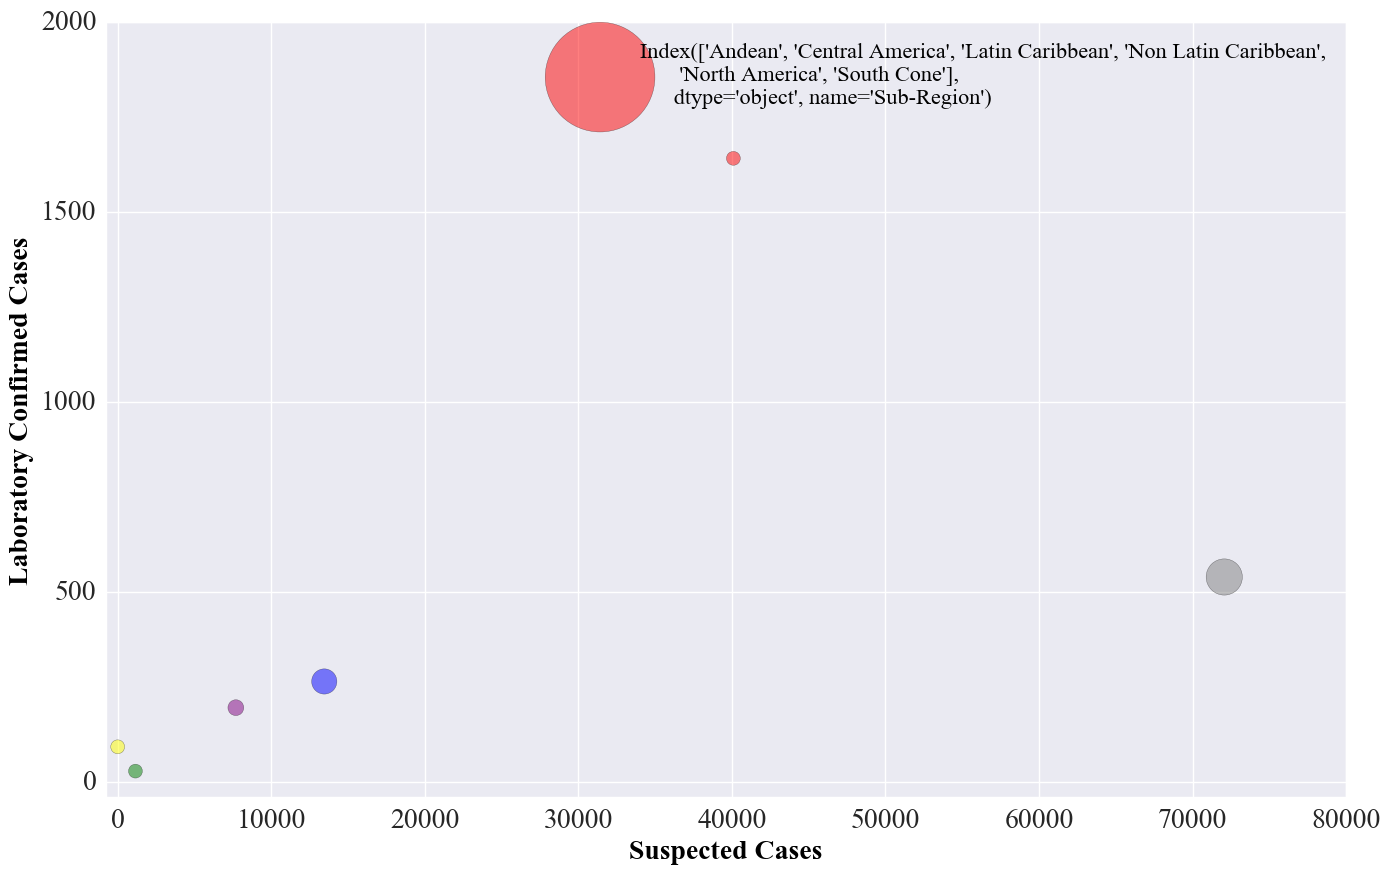

In [45]:
plt_format()

plt.scatter(zika_df.groupby("Sub-Region").sum()["Suspected cases"], 
            zika_df.groupby("Sub-Region").sum()["Laboratory confirmed cases"], 
            alpha=0.5, s=zika_df.groupby("Sub-Region").sum()["Severe cases"]*10+100,
            c=["red", "blue", "purple", "green", "yellow", "grey"], 
            label=zika_df.groupby("Sub-Region").sum().index)
#zika_df.groupby("Sub-Region").sum().index)
            #labels=)
plt.xlabel("Suspected Cases")
plt.ylabel("Laboratory Confirmed Cases")
plt.xlim(-750, 80000)
plt.ylim(-40, 2000)

plt.legend();
zika_df.groupby("Sub-Region").sum().index

In [46]:
zika_df.groupby("Date").sum().corr()
## Keep an eye on "Imported cases"

,Total Cases,Deaths,EpiWeek onset,Imported cases,Laboratory confirmed cases,Num Ctry Code,Number of GBS associated with Zika,Number of GBS,Other Neuro complications,Pregnant women,Report Epi Week,Severe cases,Suspected cases (bin),Suspected cases,Total Cases (bin),Year
Total Cases,1.000000,0.666705,0.634519,0.311045,0.318481,0.534474,0.256221,0.276675,0.275920,0.217522,0.328430,-0.166595,0.933130,0.999875,0.935551,0.530268
Deaths,0.666705,1.000000,0.703445,0.837518,0.854963,0.459232,0.866719,0.643734,0.661438,0.866694,-0.170095,0.012583,0.430061,0.655898,0.423063,0.455988
EpiWeek onset,0.634519,0.703445,1.000000,0.797929,0.481734,0.657653,0.667138,0.885776,0.887105,0.488592,0.080496,0.214164,0.372895,0.629773,0.394224,0.671513
Imported cases,0.311045,0.837518,0.797929,1.000000,0.784880,0.421881,0.974975,0.924300,0.936880,0.884663,-0.326616,0.213603,-0.014096,0.299562,-0.004340,0.431928
Laboratory confirmed cases,0.318481,0.854963,0.481734,0.784880,1.000000,0.544335,0.873990,0.570210,0.554076,0.931388,-0.057922,-0.108141,0.054109,0.303447,0.034601,0.536098
Num Ctry Code,0.534474,0.459232,0.657653,0.421881,0.544335,1.000000,0.362456,0.521251,0.439521,0.293371,0.713982,-0.241245,0.321416,0.528164,0.317813,0.999549
Number of GBS associated with Zika,0.256221,0.866719,0.667138,0.974975,0.873990,0.362456,1.000000,0.827200,0.838628,0.965696,-0.373959,0.160533,-0.057831,0.242966,-0.057237,0.367330
Number of GBS,0.276675,0.643734,0.885776,0.924300,0.570210,0.521251,0.827200,1.000000,0.988479,0.660753,-0.148761,0.260482,-0.058206,0.268596,-0.035923,0.539532
Other Neuro complications,0.275920,0.661438,0.887105,0.936880,0.554076,0.439521,0.838628,0.988479,1.000000,0.668643,-0.252489,0.294864,-0.039406,0.268106,-0.015600,0.457654
Pregnant women,0.217522,0.866694,0.488592,0.884663,0.931388,0.293371,0.965696,0.660753,0.668643,1.000000,-0.381078,0.075981,-0.063354,0.203109,-0.073997,0.291433


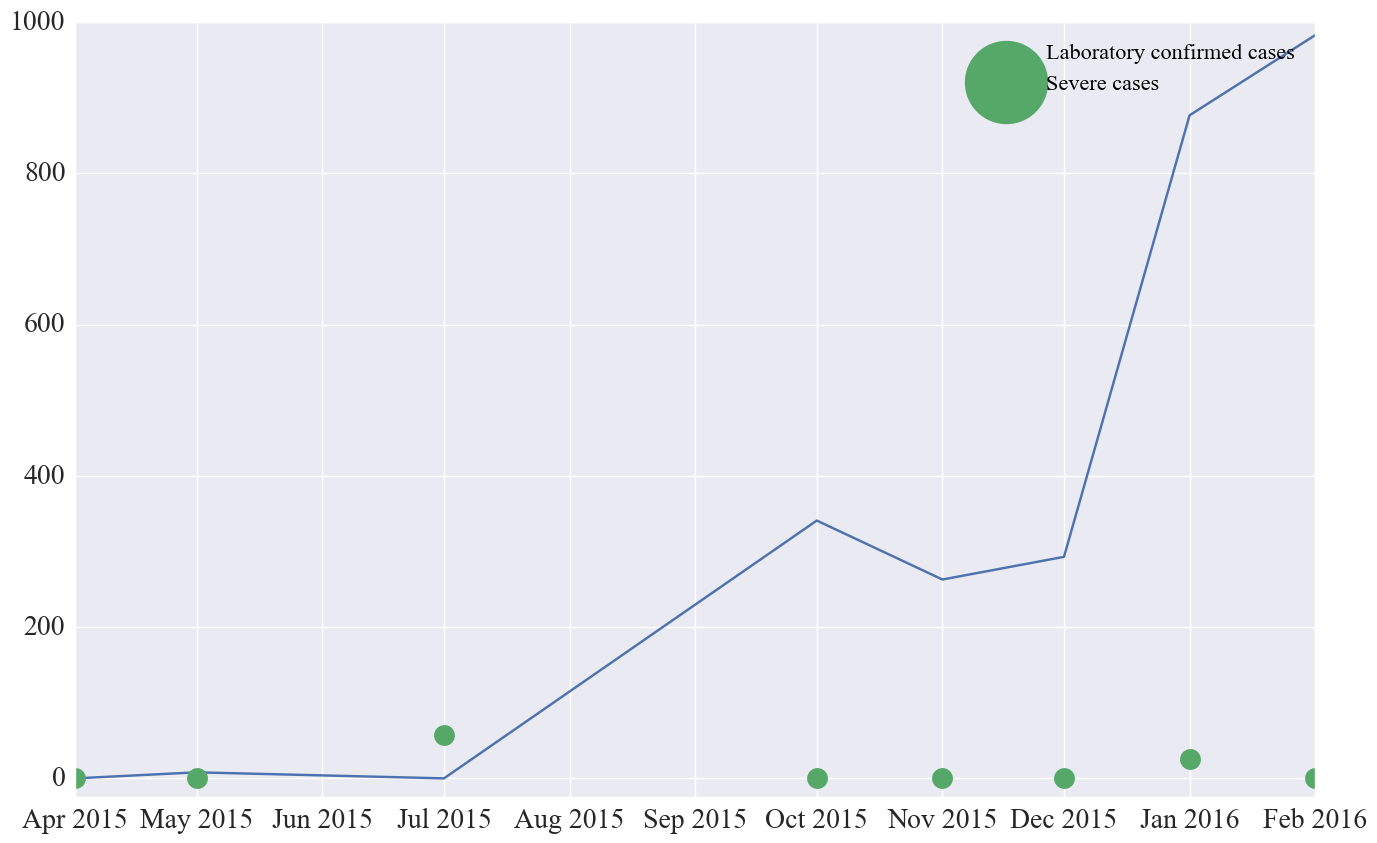

In [47]:
zika_df.groupby("Date").sum()
#zika_df.columns

plt_format()

#plt.plot(zika_df.groupby("Date").sum()["Suspected cases"])
plt.plot(zika_df.groupby("Date").sum()["Laboratory confirmed cases"])
plt.plot(zika_df.groupby("Date").sum()["Severe cases"], "o", markersize=15)
plt.ylim(-25, 1000)

plt.legend();

In [48]:
zika_df.groupby("Country name").sum()

zika_df.groupby("Country name").sum()["Laboratory confirmed cases"] / zika_df.groupby("Country name").sum()["Suspected cases"]
# 37.8% of Guatemala "Suspected cases" were "Laboratory confirmed cases"

Country name
Aruba                                     inf
Barbados                                  inf
Bolivia                                   inf
Bonaire, Saint Eustatius and Saba         inf
Brazil                               0.007410
Colombia                             0.045538
Costa Rica                                inf
Curacao                                   inf
Dominican Republic                   0.059016
Ecuador                                   inf
El Salvador                          0.000349
French Guiana                        0.125316
Guadeloupe                           0.113122
Guatemala                            0.377698
Guyana                                    inf
Haiti                                0.015198
Honduras                             0.000436
Jamaica                                   inf
Martinique                           0.001983
Mexico                                    inf
Nicaragua                                 inf
Panama               

In [49]:
zika_df.groupby("Country name").mean()['Report Epi Week']


Country name
Aruba                                31.300000
Barbados                             31.000000
Bolivia                              30.800000
Bonaire, Saint Eustatius and Saba    31.300000
Brazil                               30.730769
Colombia                             32.578947
Costa Rica                           29.000000
Curacao                              32.473684
Dominican Republic                   31.100000
Ecuador                              28.318182
El Salvador                          31.516129
French Guiana                        27.347826
Guadeloupe                           28.545455
Guatemala                            33.952381
Guyana                               32.368421
Haiti                                34.545455
Honduras                             31.040000
Jamaica                              32.473684
Martinique                           27.347826
Mexico                               31.608696
Nicaragua                            28.863636


In [50]:
zika_df.groupby("Country name").sum()

zika_df.groupby("Country name").sum()["Deaths"] / zika_df.groupby("Country name").sum()["Laboratory confirmed cases"]
# 66.7% of Suriname "Laboratory confirmed cases" resulted in "Dealths"
# 25% of Venezuela "Laboratory confirmed cases" resulted in "Dealths"

Country name
Aruba                                0.000000
Barbados                             0.000000
Bolivia                              0.000000
Bonaire, Saint Eustatius and Saba    0.000000
Brazil                               0.007491
Colombia                             0.001861
Costa Rica                           0.000000
Curacao                              0.000000
Dominican Republic                   0.000000
Ecuador                              0.000000
El Salvador                          0.000000
French Guiana                        0.000000
Guadeloupe                           0.000000
Guatemala                            0.000000
Guyana                               0.000000
Haiti                                0.000000
Honduras                             0.000000
Jamaica                              0.000000
Martinique                           0.000000
Mexico                               0.000000
Nicaragua                            0.000000
Panama               

In [51]:
zika_df.corr()
# Number of GBS + Other Neuro complications == 0.930601 correlation
# Number of GBS associated with Zika + Deaths == 0.433537 correlation

,Total Cases,Deaths,EpiWeek onset,Imported cases,Laboratory confirmed cases,Num Ctry Code,Number of GBS associated with Zika,Number of GBS,Other Neuro complications,Pregnant women,Report Epi Week,Severe cases,Suspected cases (bin),Suspected cases,Total Cases (bin),Year
Total Cases,1.000000,0.238438,0.102847,-0.009041,0.138701,-0.114863,0.137599,0.096097,0.080859,0.167567,-0.009300,0.001077,0.983111,0.999902,0.987499,0.002349
Deaths,0.238438,1.000000,0.124620,-0.007104,0.107022,-0.014539,0.423537,0.193271,0.155032,0.231115,-0.059634,-0.003972,0.181026,0.237367,0.204807,0.011000
EpiWeek onset,0.102847,0.124620,1.000000,0.224177,0.003900,-0.016659,0.138157,-0.008344,-0.006270,-0.007170,-0.056606,0.146704,0.063869,0.102983,0.083496,0.045825
Imported cases,-0.009041,-0.007104,0.224177,1.000000,0.007389,-0.046476,-0.006045,-0.005960,-0.004479,-0.005938,-0.118625,-0.004762,-0.005717,-0.009162,-0.006076,0.120380
Laboratory confirmed cases,0.138701,0.107022,0.003900,0.007389,1.000000,-0.141262,0.141486,0.002395,-0.003982,0.463857,-0.091417,-0.007180,0.052900,0.124804,0.063719,0.097759
Num Ctry Code,-0.114863,-0.014539,-0.016659,-0.046476,-0.141262,1.000000,0.022253,0.051109,0.063763,-0.073484,0.008886,-0.067335,-0.082600,-0.113078,-0.090330,0.000086
Number of GBS associated with Zika,0.137599,0.423537,0.138157,-0.006045,0.141486,0.022253,1.000000,0.625901,0.605617,0.298944,-0.084633,-0.003380,0.099569,0.135853,0.080400,0.089361
Number of GBS,0.096097,0.193271,-0.008344,-0.005960,0.002395,0.051109,0.625901,1.000000,0.930601,-0.001364,-0.065557,0.011238,0.075467,0.096242,0.061485,0.064907
Other Neuro complications,0.080859,0.155032,-0.006270,-0.004479,-0.003982,0.063763,0.605617,0.930601,1.000000,-0.003123,-0.063587,-0.002504,0.073771,0.081067,0.059569,0.066208
Pregnant women,0.167567,0.231115,-0.007170,-0.005938,0.463857,-0.073484,0.298944,-0.001364,-0.003123,1.000000,-0.080754,-0.001701,0.127748,0.161314,0.103453,0.086468


In [52]:
zika_df.describe()
# Number of GBS + Other Neuro complications == 0.930601 correlation

,Total Cases,Deaths,EpiWeek onset,Imported cases,Laboratory confirmed cases,Num Ctry Code,Number of GBS associated with Zika,Number of GBS,Other Neuro complications,Pregnant women,Report Epi Week,Severe cases,Suspected cases (bin),Suspected cases,Total Cases (bin),Year
count,681.000000,680.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,201.505140,0.017647,0.750367,0.051395,4.060206,429.124816,0.011747,0.634361,0.005874,9.616740,31.023495,0.123348,117.474302,197.444934,122.669604,2015.349486
std,1993.992596,0.229581,5.811697,0.557306,28.174001,224.967966,0.179485,9.830023,0.121125,149.565965,20.638899,2.392279,1897.599899,1990.280426,1864.579789,0.477158
min,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,222.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,388.000000,0.000000,0.000000,0.000000,0.000000,43.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,591.000000,0.000000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,2016.000000
max,47172.000000,4.000000,52.000000,10.000000,526.000000,862.000000,3.000000,252.000000,3.000000,3177.000000,52.000000,58.000000,47000.000000,47172.000000,44982.000000,2016.000000


In [53]:
zika_df.sort_values(by='Date')

## Brazil had the first reports, starting in April 2015, whereas no other countries reported until October 2015.

,Sub-Region,Total Cases,Country name,Date,Deaths,EpiWeek onset,Imported cases,Laboratory confirmed cases,Num Ctry Code,Number of GBS associated with Zika,...,Other Neuro complications,Pregnant women,Report Epi Week,Severe cases,Sovereign,Status,Suspected cases (bin),Suspected cases,Total Cases (bin),Year
0,South Cone,6807.0,Brazil,2015-04-01,0.0,8,0,0,76,0,...,0,0,17,0,Brazil,Member State,4000.0,6807,6426.0,2015
1,South Cone,8.0,Brazil,2015-05-01,0.0,0,0,8,76,0,...,0,0,19,0,Brazil,Member State,0.0,0,0.0,2015
2,South Cone,0.0,Brazil,2015-05-01,0.0,0,0,0,76,0,...,0,0,20,0,Brazil,Member State,0.0,0,0.0,2015
3,South Cone,39.0,Brazil,2015-07-01,0.0,25,0,0,76,0,...,0,0,27,58,Brazil,Member State,0.0,39,0.0,2015
85,Non Latin Caribbean,0.0,Jamaica,2015-10-01,0.0,0,0,0,388,0,...,0,0,42,0,Jamaica,Member State,0.0,0,0.0,2015
86,Non Latin Caribbean,0.0,Saint Vincent and the Grenadines,2015-10-01,0.0,0,0,0,670,0,...,0,0,42,0,St. Vincent and the Grenadines,Member State,0.0,0,0.0,2015
87,Non Latin Caribbean,0.0,Suriname,2015-10-01,0.0,0,0,0,740,0,...,0,0,42,0,Suriname,Member State,0.0,0,0.0,2015
88,Non Latin Caribbean,0.0,Trinidad and Tobago,2015-10-01,0.0,0,0,0,780,0,...,0,0,42,0,Trinidad and Tobago,Member State,0.0,0,0.0,2015
89,North America,0.0,Mexico,2015-10-01,0.0,0,0,0,484,0,...,0,0,42,0,Mexico,Member State,0.0,0,0.0,2015
90,South Cone,0.0,Brazil,2015-10-01,0.0,0,0,0,76,0,...,0,0,42,0,Brazil,Member State,0.0,0,0.0,2015


C:\Users\hms_9\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


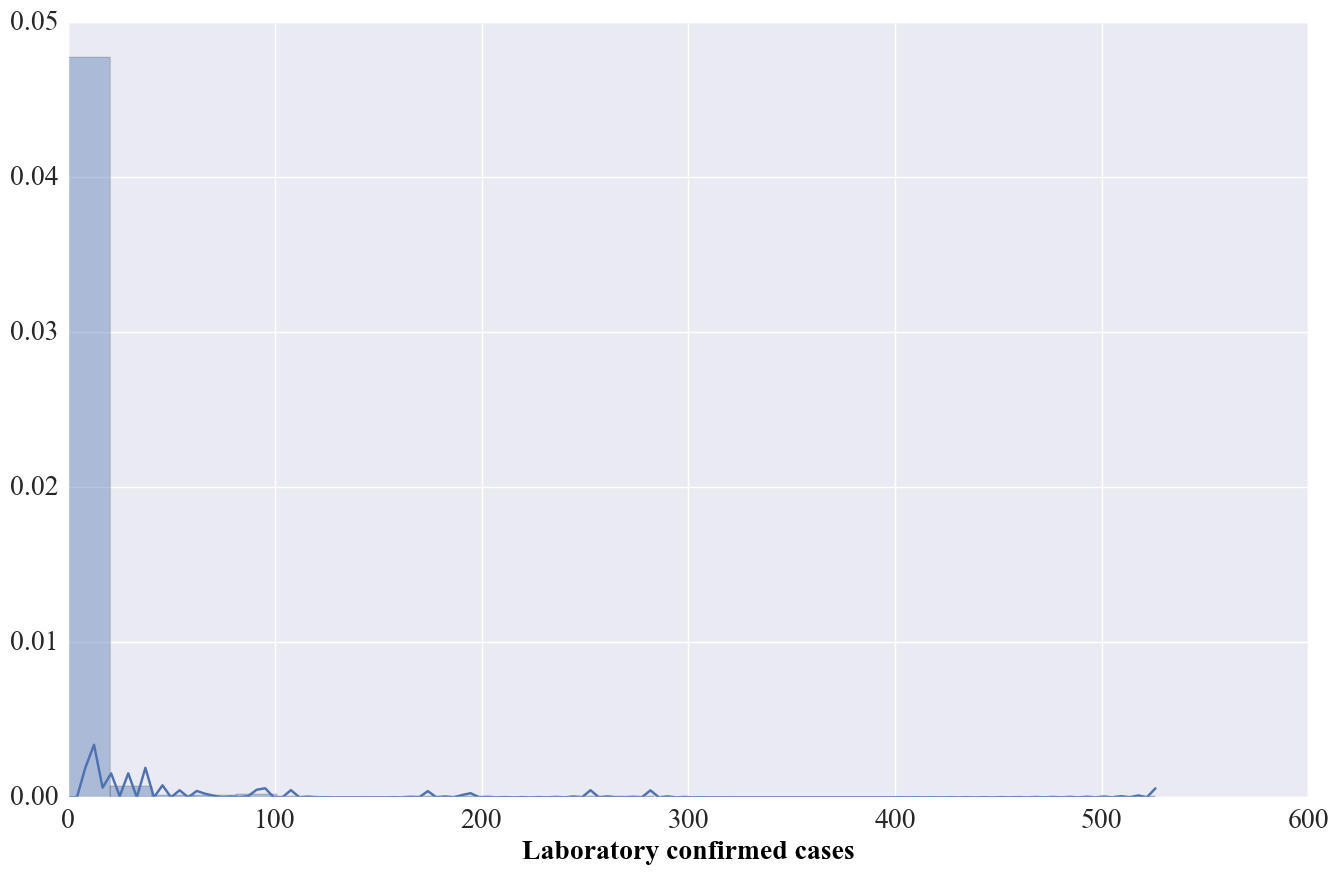

In [54]:
plt_format()

sns.distplot(zika_df["Laboratory confirmed cases"])

In [55]:
zika_df['Severe cases'].max()

58

In [56]:
## BIN THE CASES TO MAKE CLASSIFICATIONS:

# Re-assign the data frame to a varible:
df = zika_df

# Specify bins to group the number of "Serious cases" & create labels:
bins = [-1, 0, 100000]
groups = ['No Severe Cases Reported', 'Severe Cases Reported']
cats = [0, 1]

# Add extra columns & insert the binned data:
severe = pd.cut(df.loc[:, 'Severe cases'], bins, labels=groups)
df['severe'] = pd.cut(df.loc[:, 'Severe cases'], bins, labels=groups)
severe = pd.cut(df.loc[:, 'Severe cases'], bins, labels=cats)
df['severe_cats'] = pd.cut(df.loc[:, 'Severe cases'], bins, labels=cats)

# Print the column names contained in df:
print('Column Names: ')
df.columns

Column Names: 


C:\Users\hms_9\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\hms_9\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Index(['Sub-Region', 'Total Cases', 'Country name', 'Date', 'Deaths',
       'EpiWeek onset', 'Imported cases', 'Laboratory confirmed cases',
       'Num Ctry Code', 'Number of GBS associated with Zika', 'Number of GBS',
       'Other Neuro complications', 'Pregnant women', 'Report Epi Week',
       'Severe cases', 'Sovereign', 'Status', 'Suspected cases (bin)',
       'Suspected cases', 'Total Cases (bin)', 'Year', 'severe',
       'severe_cats'],
      dtype='object')

In [57]:
df[['Severe cases', 'severe', 'severe_cats']].sum()

Severe cases                                                   84
severe          No Severe Cases ReportedNo Severe Cases Report...
severe_cats                                                     3
dtype: object

In [58]:
df.Deaths.fillna(0, inplace=True)


C:\Users\hms_9\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [59]:
## DEFINE INPUT & OUTPUT VARIABLES:

# Eliminate vehicle_id as it is a unique identifier as well as all output variables:
X = df.drop(['Sub-Region', 'Country name','Sovereign', 'Status', 'Date', 'Severe cases', 'severe', 'severe_cats'], axis=1)

# Identify both the numeric & categorical outputs for comparison:
y1, y2 = df.severe, df.severe_cats

# Print the first row of the input features for reference:
print(X.iloc[0, :])

Total Cases                           6807.0
Deaths                                   0.0
EpiWeek onset                            8.0
Imported cases                           0.0
Laboratory confirmed cases               0.0
Num Ctry Code                           76.0
Number of GBS associated with Zika       0.0
Number of GBS                            0.0
Other Neuro complications                0.0
Pregnant women                           0.0
Report Epi Week                         17.0
Suspected cases (bin)                 4000.0
Suspected cases                       6807.0
Total Cases (bin)                     6426.0
Year                                  2015.0
Name: 0, dtype: float64


In [60]:
## DEFINE A FUNCTION THAT IDENTIFIES WHICH FEATURE(S) IS(ARE) SELECTED:

def identify(output):
    list = []
    for i in range(len(X.columns)):
        for j in range(output.shape[1]):
            if output[0, j] == X.iloc[0, i]:
                list.append(X.columns[i])
    print(list)

In [61]:
## UNIVARIATE FEATURE SELECTION:

# Select 'k' best using chi-squared:
output = SelectKBest(chi2, k=1).fit_transform(X, y1)
print('Best 1 Feature, severe: ')
identify(output)

output = SelectKBest(chi2, k=1).fit_transform(X, y2)
print('Best 1 Feature, severe_cats: ')
identify(output)

output = SelectKBest(chi2, k=2).fit_transform(X, y1)
print('\nBest 2 Features, severe: ')
identify(output)

output = SelectKBest(chi2, k=2).fit_transform(X, y2)
print('Best 2 Features, severe_cats: ')
identify(output)

Best 1 Feature, severe: 
['Total Cases (bin)']
Best 1 Feature, severe_cats: 
['Total Cases (bin)']

Best 2 Features, severe: 
['Suspected cases (bin)', 'Total Cases (bin)']
Best 2 Features, severe_cats: 
['Suspected cases (bin)', 'Total Cases (bin)']


In [62]:
## LOGIT CLASSIFIER FOR FEATURE SELECTION:

# Using logistic regression:
linear = LogisticRegression(C=0.0001, penalty="l2", solver='sag', dual=False).fit(X, y1)
output = SelectFromModel(linear, prefit=True).transform(X)
print('Best 2 Features, severe: ')
identify(output)

linear = LogisticRegression(C=0.0001, penalty="l2", solver='sag', dual=False).fit(X, y2)
print('Best 2 Features, severe_cats: ')
identify(output)

Best 2 Features, severe: 
['Num Ctry Code', 'Year']
Best 2 Features, severe_cats: 
['Num Ctry Code', 'Year']


C:\Users\hms_9\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [63]:
## TREE-BASED FEATURE SELECTION:

# Ensemble model tree-based estimators compute relative importance of each attribute:
clf = ExtraTreesClassifier().fit(X, y1)
print('Feature Importance Scores: ', clf.feature_importances_)
output = SelectFromModel(clf, prefit=True).transform(X)
print('Best 3 Features, severe: ')
identify(output)
print('Order of Importance = \n')

clf = ExtraTreesClassifier().fit(X, y2)
print('Feature Importance Scores: ', clf.feature_importances_)
output = SelectFromModel(clf, prefit=True).transform(X)
print('Best 3 Features, severe_cats: ')
identify(output)
print('Order of Importance = ')

Feature Importance Scores:  [  1.11742534e-01   4.19724801e-05   1.50014899e-01   4.52832096e-04
   2.78682721e-02   6.65305973e-02   1.46474230e-04   2.88245907e-01
   2.15656277e-04   9.85134734e-02   1.62369147e-01   2.79130988e-03
   7.09182795e-02   1.99179094e-03   1.81568545e-02]
Best 3 Features, severe: 
['Total Cases', 'Total Cases', 'Deaths', 'Deaths', 'EpiWeek onset', 'Imported cases', 'Imported cases', 'Laboratory confirmed cases', 'Laboratory confirmed cases', 'Number of GBS associated with Zika', 'Number of GBS associated with Zika', 'Number of GBS', 'Number of GBS', 'Other Neuro complications', 'Other Neuro complications', 'Pregnant women', 'Pregnant women', 'Report Epi Week', 'Suspected cases', 'Suspected cases']
Order of Importance = 

Feature Importance Scores:  [  7.50082462e-02   0.00000000e+00   1.69890596e-01   2.24913768e-05
   3.48963163e-03   3.57835674e-02   2.34719901e-06   2.49574208e-01
   1.46310449e-05   1.99233363e-01   1.71865413e-01   1.99366613e-05
  

In [64]:
#zika_df.groupby('Status').sum()
a = pd.pivot_table(zika_df, index=['Date'])['Suspected cases']
#a = pd.pivot_table(zika_df, values=['Suspected cases'])
a = pd.pivot_table(zika_df, index=['Date'])#['Pregnant women']

plt_format()

#plt.plot(a.values)
a.values #['Suspected cases']
a

,Deaths,EpiWeek onset,Imported cases,Laboratory confirmed cases,Num Ctry Code,Number of GBS,Number of GBS associated with Zika,Other Neuro complications,Pregnant women,Report Epi Week,Severe cases,Suspected cases,Suspected cases (bin),Total Cases,Total Cases (bin),Year
Date,,,,,,,,,,,,,,,,
2015-04-01,0.000000,8.000000,0.000000,0.000000,76.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,6807.000000,4000.000000,6807.000000,6426.000000,2015.000000
2015-05-01,0.000000,0.000000,0.000000,4.000000,76.000000,0.000000,0.000000,0.000000,0.000000,19.500000,0.000000,0.000000,0.000000,4.000000,0.000000,2015.000000
2015-07-01,0.000000,25.000000,0.000000,0.000000,76.000000,0.000000,0.000000,0.000000,0.000000,27.000000,58.000000,39.000000,0.000000,39.000000,0.000000,2015.000000
2015-10-01,0.000000,0.309524,0.000000,2.706349,434.380952,0.000000,0.000000,0.000000,0.000000,41.515873,0.000000,3.880952,0.000000,6.587302,0.000000,2015.000000
2015-11-01,0.021583,0.928058,0.007194,1.892086,434.021583,0.035971,0.000000,0.000000,0.000000,45.539568,0.000000,485.791367,431.654676,487.683453,439.187050,2015.000000
2015-12-01,0.000000,0.260116,0.000000,1.693642,427.693642,0.323699,0.000000,0.000000,0.369942,50.063584,0.000000,62.919075,0.000000,64.612717,0.000000,2015.000000
2016-01-01,0.029070,1.511628,0.145349,5.098837,420.813953,2.104651,0.029070,0.023256,19.156977,2.546512,0.151163,187.302326,46.511628,192.401163,56.040698,2015.994186
2016-02-01,0.059701,0.074627,0.134328,14.671642,455.194030,0.134328,0.044776,0.000000,47.611940,5.731343,0.000000,246.253731,119.402985,260.925373,95.910448,2016.000000


In [65]:
pd.pivot_table(zika_df, columns=['Date'], aggfunc=np.sum)

Date,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-07-01 00:00:00,2015-10-01 00:00:00,2015-11-01 00:00:00,2015-12-01 00:00:00,2016-01-01 00:00:00,2016-02-01 00:00:00
Deaths,0.0,0.0,0.0,0.0,3.0,0.0,5.0,4.0
EpiWeek onset,8.0,0.0,25.0,39.0,129.0,45.0,260.0,5.0
Imported cases,0.0,0.0,0.0,0.0,1.0,0.0,25.0,9.0
Laboratory confirmed cases,0.0,8.0,0.0,341.0,263.0,293.0,877.0,983.0
Num Ctry Code,76.0,152.0,76.0,54732.0,60329.0,73991.0,72380.0,30498.0
Number of GBS,0.0,0.0,0.0,0.0,5.0,56.0,362.0,9.0
Number of GBS associated with Zika,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0
Other Neuro complications,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
Pregnant women,0.0,0.0,0.0,0.0,0.0,64.0,3295.0,3190.0
Report Epi Week,17.0,39.0,27.0,5231.0,6330.0,8661.0,438.0,384.0


In [66]:
zika_df[zika_df.Date == '2016-01-01']['EpiWeek onset'].values #['Severe cases']
#zika_df[zika_df.Date == '2016-01-01']['Severe cases'].values
zika_df[zika_df.Date == '2016-01-01']['Report Epi Week'].values
zika_df['Report Epi Week'].values# - 
zika_df['EpiWeek onset'].values
# I think that most of these '0' values are actually unknown / NaN.

array([ 8,  0,  0, 25,  0,  0,  0,  0,  0, 39,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, 45,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [67]:
raw_df.iloc[568, :]
## Date is 'January, 2016', but the Year is recorded as '2015'.  
## 'EpiWeek onset' is '0' and 'Report Epi Week' is '4', so this is clearly 2016 data.

Sub-Region                             Non Latin Caribbean
Alpha3Code                                             SUR
Alpha Ctry Code                                        SUR
Total Cases                                        109700%
Country / territory                               Suriname
Country name                                      Suriname
Date                                         January, 2016
Deaths                                                   4
EpiWeek onset                                            0
Imported cases                                           0
Laboratory confirmed cases                               0
Nombre Pais                                       Suriname
NumCtryCode (Countries codes)                          740
Num Ctry Code                                          740
Number of GBS associated with Zika                       0
Number of GBS                                           13
Number of Records                                       

In [68]:
pd.pivot_table(zika_df, index=['Country name', 'Date'], aggfunc=np.sum)
zika_df
pd.pivot_table(zika_df, index=['Sub-Region'], aggfunc=np.sum)

,Deaths,EpiWeek onset,Imported cases,Laboratory confirmed cases,Num Ctry Code,Number of GBS,Number of GBS associated with Zika,Other Neuro complications,Pregnant women,Report Epi Week,Severe cases,Suspected cases,Suspected cases (bin),Total Cases,Total Cases (bin),Year
Sub-Region,,,,,,,,,,,,,,,,
Andean,4.0,39,15,1642,26626,294,6,3,6356,2522,0,40095,16000.0,41737.0,16065.0,163243
Central America,0.0,90,2,265,53289,121,0,0,165,4518,23,13452,0.0,13717.0,0.0,294243
Latin Caribbean,0.0,260,10,196,66594,4,2,1,22,4944,3,7695,0.0,7891.0,0.0,330521
Non Latin Caribbean,4.0,0,7,29,121217,13,0,0,3,6957,0,1156,0.0,1185.0,0.0,447406
North America,0.0,0,1,93,11132,0,0,0,3,727,0,0,0.0,93.0,0.0,46353
South Cone,4.0,122,0,540,13376,0,0,0,0,1459,58,72062,64000.0,72602.0,67473.0,90687


In [69]:
pd.pivot_table(zika_df, index=['Country name', 'Date'], aggfunc=np.sum)
zika_df
pd.pivot_table(zika_df, index=['Status'], aggfunc=np.sum)

,Deaths,EpiWeek onset,Imported cases,Laboratory confirmed cases,Num Ctry Code,Number of GBS,Number of GBS associated with Zika,Other Neuro complications,Pregnant women,Report Epi Week,Severe cases,Suspected cases,Suspected cases (bin),Total Cases,Total Cases (bin),Year
Status,,,,,,,,,,,,,,,,
Associated Member,0.0,0,7,37,46453,1,0,0,1,2552,3,0,0.0,37.0,0.0,167275
Member State,12.0,251,18,2580,179513,428,6,3,6527,14805,81,127340,80000.0,129920.0,83538.0,943176
Other,0.0,0,0,4,18700,0,0,0,0,637,0,59,0.0,63.0,0.0,44339
Overseas collectivities,0.0,0,0,7,13260,0,0,0,0,621,0,0,0.0,7.0,0.0,40307
Participating State \Territory,0.0,260,10,137,34308,3,2,1,21,2512,0,7061,0.0,7198.0,0.0,177356


In [70]:
pd.DataFrame([pd.pivot_table(zika_df, index=['Year'], aggfunc=np.sum).iloc[0, :] / 9, 
              pd.pivot_table(zika_df, index=['Year'], aggfunc=np.sum).iloc[1, :] / 2])
## Data sums by month

,Deaths,EpiWeek onset,Imported cases,Laboratory confirmed cases,Num Ctry Code,Number of GBS,Number of GBS associated with Zika,Other Neuro complications,Pregnant women,Report Epi Week,Severe cases,Suspected cases,Suspected cases (bin),Total Cases,Total Cases (bin)
2015,0.777778,27.333333,0.111111,100.555556,21121.777778,8.222222,0.0,0.0,7.111111,2256.555556,6.444444,9649.111111,7111.111111,9749.666667,7497.0
2016,2.500000,132.500000,17.000000,930.000000,51069.000000,179.000000,4.0,2.0,3242.500000,409.000000,13.000000,23809.000000,8000.000000,24739.000000,8032.5


In [71]:
pd.pivot_table(zika_df, index=['Year'], aggfunc=np.sum)

,Deaths,EpiWeek onset,Imported cases,Laboratory confirmed cases,Num Ctry Code,Number of GBS,Number of GBS associated with Zika,Other Neuro complications,Pregnant women,Report Epi Week,Severe cases,Suspected cases,Suspected cases (bin),Total Cases,Total Cases (bin)
Year,,,,,,,,,,,,,,,
2015,7.0,246,1,905,190096,74,0,0,64,20309,58,86842,64000.0,87747.0,67473.0
2016,5.0,265,34,1860,102138,358,8,4,6485,818,26,47618,16000.0,49478.0,16065.0


In [72]:
pd.pivot_table(zika_df, index=['Country name'], aggfunc=np.sum)

,Deaths,EpiWeek onset,Imported cases,Laboratory confirmed cases,Num Ctry Code,Number of GBS,Number of GBS associated with Zika,Other Neuro complications,Pregnant women,Report Epi Week,Severe cases,Suspected cases,Suspected cases (bin),Total Cases,Total Cases (bin),Year
Country name,,,,,,,,,,,,,,,,
Aruba,0.0,0,7,4,10660,0,0,0,0,626,0,0,0.0,4.0,0.0,40307
Barbados,0.0,0,0,7,1040,0,0,0,3,620,0,0,0.0,7.0,0.0,40307
Bolivia,0.0,0,1,1,1360,0,0,0,0,616,0,0,0.0,1.0,0.0,40307
"Bonaire, Saint Eustatius and Saba",0.0,0,0,1,10700,0,0,0,0,626,0,0,0.0,1.0,0.0,40307
Brazil,4.0,77,0,534,1976,0,0,0,0,799,58,72062,64000.0,72596.0,67473.0,52397
Colombia,3.0,39,0,1612,3230,42,3,0,6356,619,0,35399,12000.0,37011.0,12852.0,38291
Costa Rica,0.0,0,0,3,4136,0,0,0,1,638,0,0,0.0,3.0,0.0,44339
Curacao,0.0,0,0,1,10089,0,0,0,0,617,0,0,0.0,1.0,0.0,38291
Dominican Republic,0.0,0,0,18,4280,0,0,0,0,622,0,305,0.0,323.0,0.0,40307
